# **Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.17.0'

In [4]:
tf.test.is_built_with_cuda()

True

**Load the dataset**

Our dataset contains 60000 small training images that belongs to one of the below 10 classes

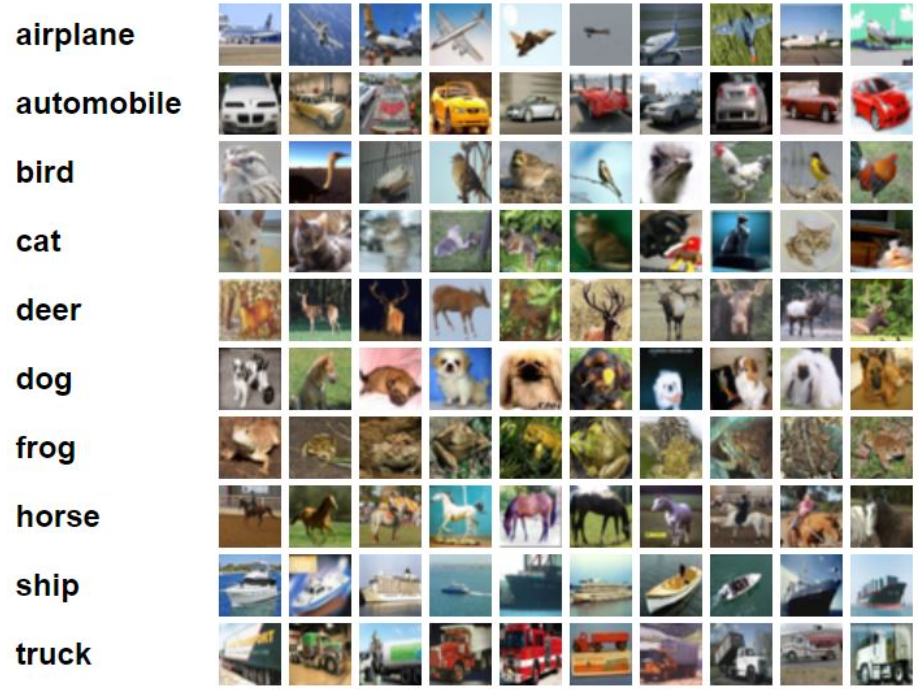

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

# **Data Visualization**

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

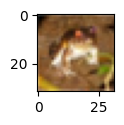

In [9]:
plot_sample(0)

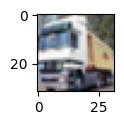

In [10]:
plot_sample(1)

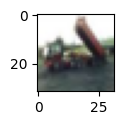

In [11]:
plot_sample(2)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

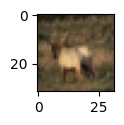

In [13]:
plot_sample(3)

In [14]:
classes[y_train[3][0]]

'deer'

In [15]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [16]:
y_test.shape

(10000, 1)

In [17]:
X_train.shape

(50000, 32, 32, 3)

# **Preprocessing: Scale images**

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
import tensorflow as tf # Import TensorFlow if not already imported

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)  # Remove dtype argument
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)  # Remove dtype argument

# If you need to specify the data type, you can cast the result:
y_train_categorical = y_train_categorical.astype('float32')
y_test_categorical = y_test_categorical.astype('float32')


In [20]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# **Model building and training**

In [22]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3060 - loss: 1.9264


**Let's make some predictions**

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


3

In [23]:
y_test[0]

array([3], dtype=uint8)

In [24]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**Measure training time on a CPU**

In [25]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.3065 - loss: 1.9264
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Lets measure training time on a GPU (I've NVIDIA Titan RTX)**

In [26]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2997 - loss: 1.9326
7.53 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Lets run same test for 10 epocs**

In [27]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 76ms/step - accuracy: 0.3072 - loss: 1.9253
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4210 - loss: 1.6423
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - accuracy: 0.4504 - loss: 1.5493
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.4755 - loss: 1.4883
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - accuracy: 0.4914 - loss: 1.4409
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.5096 - loss: 1.3936
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.5284 - loss: 1.3490
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.5413 - loss: 1.3083
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 0.5490 - loss: 1.2906
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.5617 - loss: 1.2507
21min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [28]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3056 - loss: 1.9304
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4189 - loss: 1.6424
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4494 - loss: 1.5534
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4719 - loss: 1.5002
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4957 - loss: 1.4405
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5133 - loss: 1.3938
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5233 - loss: 1.3582
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5361 - loss: 1.3121
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5469 - loss: 1.2844
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5603 - loss: 1.2533
50.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Here is the performance comparison for 1 epoch,

                    | Epoch | CPU | GPU |
                    |:-------|:----|:----|
                    |  1    | 117s | 6s  |
                    |  10   | 21m 5s| 49s |

You can see that GPU is almost 15 times faster. We ran only one epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning

# **Exercise: GPU performance for fashion mnist dataset**

This notebook is derived from a tensorflow tutorial here: https://www.tensorflow.org/tutorials/keras/classification So please refer to it before starting work on this exercise

You need to write code wherever you see your code goes here comment. You are going to do image classification for fashion mnist dataset and then you will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. You will eventually fill out this table with your performance benchmark numbers

In [29]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [30]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
train_images.shape

(60000, 28, 28)

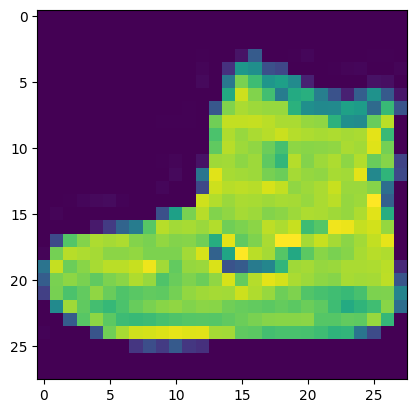

In [34]:
plt.imshow(train_images[0])

In [35]:
train_labels[0]

9

In [36]:
class_names[train_labels[0]]

'Ankle boot'

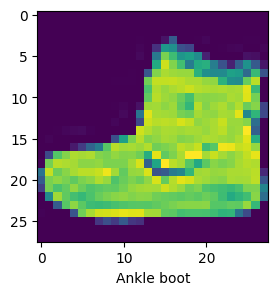

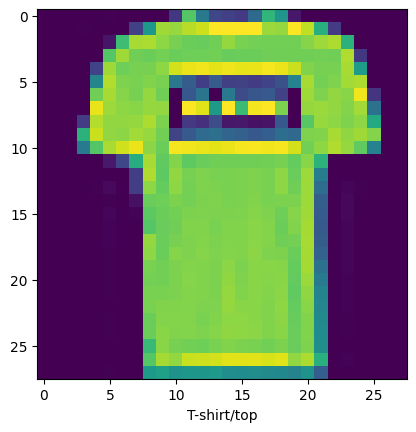

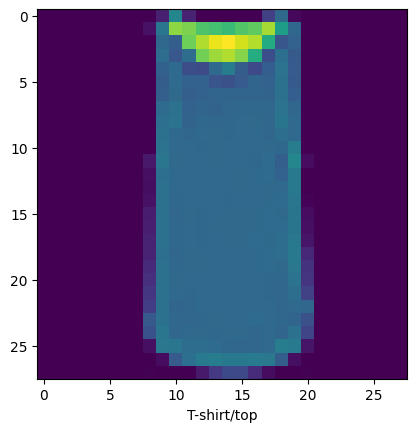

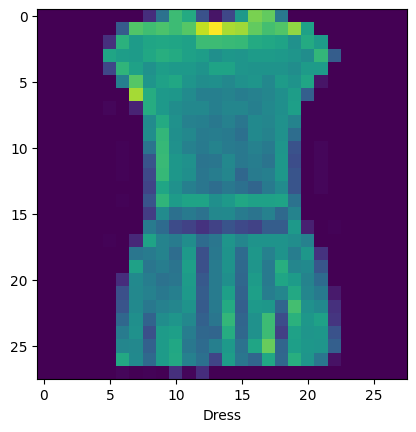

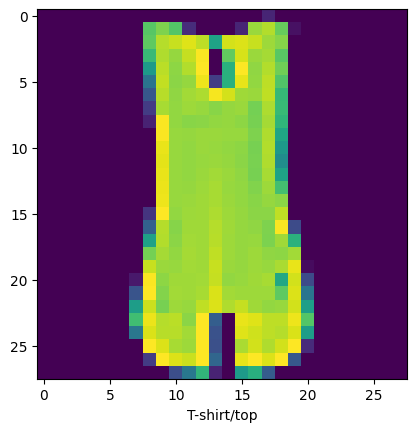

In [37]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [38]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [39]:
[3]*2

[3, 3]

In [40]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [41]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7865 - loss: 0.6029
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8684 - loss: 0.3610
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8802 - loss: 0.3242
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8910 - loss: 0.2954
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8971 - loss: 0.2767


In [42]:
model.predict(test_images_scaled)[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.9157821e-02, 9.9999976e-01, 1.5706044e-03, 1.1565108e-02,
       1.4780497e-02, 9.3632480e-10, 3.7707941e-04, 7.7948563e-13,
       1.1722568e-05, 2.2284884e-10], dtype=float32)

In [43]:
test_labels[2]

1

In [44]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**5 Epocs performance comparison for 1 hidden layer**

In [45]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7935 - loss: 0.5882
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8678 - loss: 0.3645
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8820 - loss: 0.3207
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8877 - loss: 0.2999
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8942 - loss: 0.2866
40.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [46]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7924 - loss: 0.5894
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8682 - loss: 0.3633
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8780 - loss: 0.3307
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8886 - loss: 0.2986
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8974 - loss: 0.2780
23.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**5 Epocs performance comparison with 5 hidden layers**

In [47]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.7585 - loss: 0.6540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8573 - loss: 0.3948
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8730 - loss: 0.3549
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8816 - loss: 0.3243
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8845 - loss: 0.3070
2min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [48]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7656 - loss: 0.6412
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8557 - loss: 0.4029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8689 - loss: 0.3582
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8798 - loss: 0.3340
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8885 - loss: 0.3020
32.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Here is the performance comparison for 1 epoch,

                    | Hidden Layers |  CPU  | GPU |
                    |:--------------|:------|:----|
                    |       1       |  42s  | 22s |
                    |       5       | 2m 17s| 32s |